In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
!pip install u8darts

from darts import TimeSeries

series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
train, val = series.split_after(pd.Timestamp('19590101'))

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 1.5MB 9.0MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 9.5MB 26.3MB/s 
     |████████████████████████████████| 788kB 40.2MB/s 
     |████████████████████████████████| 2.1MB 42.7MB/s 
     |████████████████████████████████| 358kB 53.7MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
ERROR: pmdarima 1.7.1 has requirement setuptools<50.0.0, but you'll have setuptools 50.3.0 which is incompatible.
ERROR: pmdarima 1.7.1 has requirement statsmodels<0.12,>=0.11, but you'll have statsmodels 0.12.0 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0

In [6]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as st

Text(0.5, 0, 'Year')

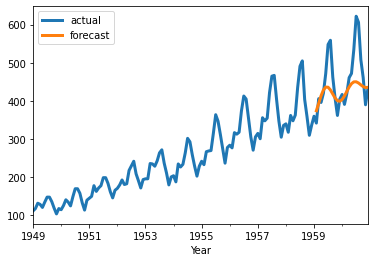

In [7]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')